<a href="https://colab.research.google.com/github/anpppo/py_app/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
import pandas as pd

def get_stock_data(date,stock_no):
  url=f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
  df = pd.read_html(url,header=1)[0]
  return df

date_range = pd.date_range(start='20240401', end='20250401',freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()

df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df, get_stock_data(date,'0050')],ignore_index=True)

df

In [ ]:
df.plot(kind='line',x='日期',y='收盤價',figsize=(12,4))
plt.show()

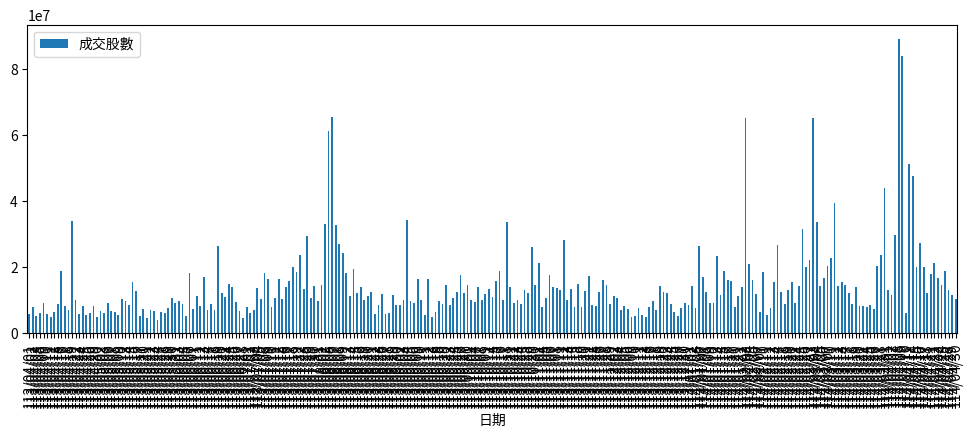

In [13]:
df.plot(kind='bar',x='日期',y='成交股數',figsize=(12,4))
plt.show()

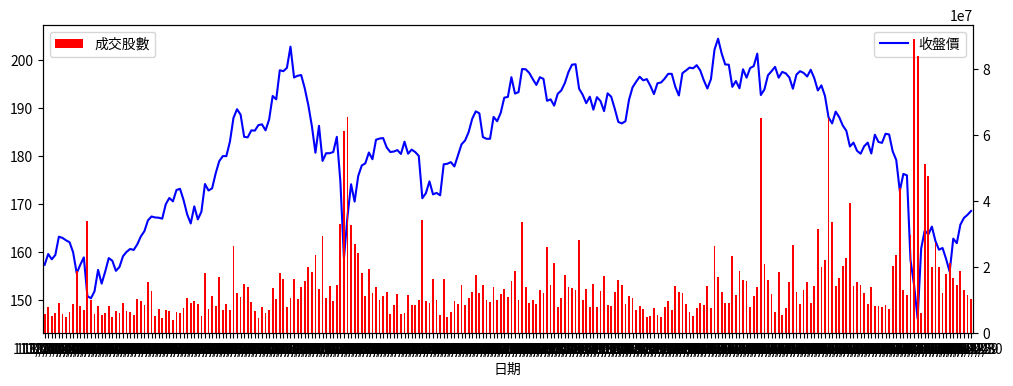

In [15]:
fig,ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color='red')
plt.show()

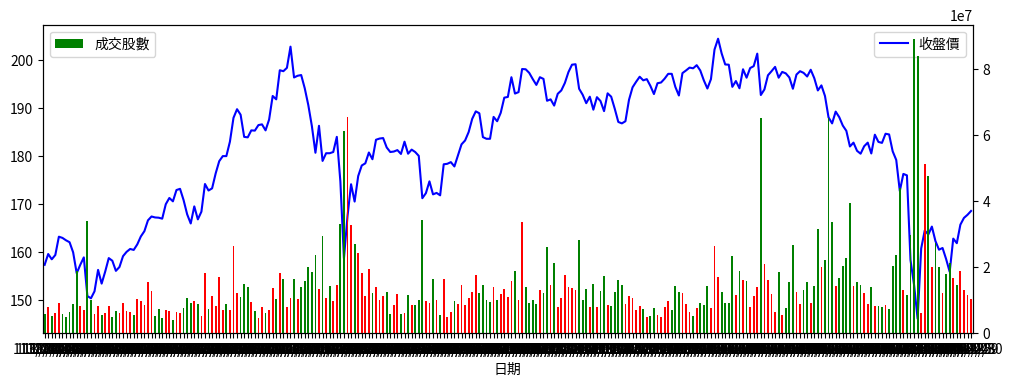

In [18]:
df['漲跌價差'] =pd.to_numeric(df['漲跌價差'],errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x: 'red' if x > 0 else 'green')

fig,ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color=df['Color'])
plt.show()
